In [21]:
import os.path

import pandas as pd
import matplotlib.pyplot as plt

## Hypothesis 1: Are the development trends of different electric vehicles in each state consistent, or have they changed?

### Washingtion State

In [26]:
def download_file(file_name: str) -> None: # wa_ev_registrations_public
    """ Download the big csv data file from link if not in the project path

    :param file_name: file name
    :return: None
    >>> if os.path.exists('data/wa_ev_registrations_public.csv')
    ...     os.remove('data/wa_ev_registrations_public.csv')
    >>> download_file(wa_ev_registrations_public)
    >>> os.path.exists('data/wa_ev_registrations_public.csv')
    True
    >>> if os.path.exists('data/wa_test.csv')
    ...     os.remove('data/wa_test.csv')
    >>> download_file(wa_ev_registrations_public)
    >>> os.path.exists('data/wa_test.csv')
    False
    """
    if not os.path.exists('data/{}.csv'.format(file_name)):
        import requests
        url = "https://www.atlasevhub.com/public/dmv/{}.csv".format(file_name)
        file = requests.get(url)
        print(file)
        with open('data/{}.csv'.format(file_name), 'wb') as text:
            text.write(file.content)

download_file('wa_ev_registrations_public')
download_file('wa_ev_registrations_public')
download_file('wa_ev_registrations_public')

In [27]:
wa_df = pd.read_csv('data/wa_ev_registrations_public.csv') # , nrows=20000
wa_df.head(10)

/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Vehicle ID,ZIP Code,Registration Valid Date,VIN Prefix,VIN Model Year,DMV ID,DMV ID Complete,DMV Snapshot,Registration Expiration Date,State Abbreviation,Geography,Vehicle Name,Technology
0,WA-047-134958694,98012,2022-03-16,5YJ3E1EC,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model 3,BEV
1,WA-047-276610085,98664,2022-03-16,JA4J24A5,J,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Mitsubishi Outlander Plug In,PHEV
2,WA-047-192782285,98020,2022-03-16,7SAYGAEE,N,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model Y,BEV
3,WA-047-179410703,98029,2022-03-16,LPSED3KA,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Polestar 2,BEV
4,WA-047-171474537,98004,2022-03-16,WP0AB2Y1,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Porsche Taycan,BEV
5,WA-047-167179218,98052,2022-03-16,5YJYGDEE,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model Y,BEV
6,WA-047-150981162,98144,2022-03-16,5YJ3E1EA,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model 3,BEV
7,WA-047-172915263,98380,2022-03-16,5YJYGDEE,M,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Tesla Model Y,BEV
8,WA-047-109791832,98020,2022-03-16,KNDJX3AE,J,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Kia Soul EV,BEV
9,WA-047-475452540,98040,2022-03-16,1N4AZ1CP,J,47,WA47,WA DMV Direct (3/16/2022),NaN,WA,ZIP Code,Nissan Leaf,BEV


### Data Pre-Processing for Dataframe

In [47]:
def preprocess_dataframe(df: pd.DataFrame, date: []) -> pd.DataFrame:
    """ Pre-process the dataframe, add some valid columns for later operation, and count for recent data

    :param df: the dataframe that need to be processed
    :param date: a list for the beginning date we count for recently data, each three elements represent year, month and day
    :return df: the dataframe after process
    :return df_recently: the recently dataframe beginning from the date

    >>> wa_test = pd.read_csv('data/wa_test.csv')
    >>> test, test_recently = preprocess_dataframe(wa_test, [2012, 12, 31])
    >>> 'Valid Datetime' in test and 'Valid Month' in test and 'Valid Quarter' in test
    True
    >>> 'Dynamic Type' in test
    True
    >>> test_recently[test_recently['Valid Datetime'] < pd.Timestamp(2012, 12, 31)].count()
    0
    """
    df['Valid Datetime'] = pd.to_datetime(df['Registration Valid Date'])
    df['Valid Month'] = df['Registration Valid Date'].str[:-3]
    df['Valid Quarter'] = pd.PeriodIndex(df['Valid Datetime'], freq='Q')
    df['Valid Year'] = df['Registration Valid Date'].str[:4]
    # count the Dynamic Type(Technology) for BEV/PHEV
    df['Dynamic Type'] = df['Technology'].apply(lambda x: 1 if x == 'BEV' else 0)

    assert max(df['Valid Datetime']) > pd.Timestamp(2015, 1, 1)
    df_recently = df[df['Valid Datetime'] >= pd.Timestamp(date[0], date[1], date[2])]
    return df, df_recently

wa_df, wa_df_recently = preprocess_dataframe(wa_df, [2015, 1, 1])
print(wa_df.dtypes)

Vehicle ID                              object
ZIP Code                                object
Registration Valid Date                 object
VIN Prefix                              object
VIN Model Year                          object
DMV ID                                   int64
DMV ID Complete                         object
DMV Snapshot                            object
Registration Expiration Date            object
State Abbreviation                      object
Geography                               object
Vehicle Name                            object
Technology                              object
Valid Datetime                  datetime64[ns]
Valid Month                             object
Valid Quarter                    period[Q-DEC]
Valid Year                              object
Dynamic Type                             int64
dtype: object


In [41]:
# show the earliest and latest registration date, which also represents the data capture time period
min(wa_df['Valid Datetime']), max(wa_df['Valid Datetime']), min(wa_df_recently['Valid Datetime']), max(wa_df_recently['Valid Datetime'])

(Timestamp('2010-01-06 00:00:00'),
 Timestamp('2022-03-16 00:00:00'),
 Timestamp('2015-01-02 00:00:00'),
 Timestamp('2022-03-16 00:00:00'))

In [72]:
def get_monthly_report(df: pd.DataFrame) -> pd.DataFrame:
    df_month = df.groupby(['Valid Month'])\
        .agg({'DMV ID': 'count', 'Dynamic Type': 'sum'}).reset_index()\
        .rename(columns={'DMV ID': 'Vehicles Total Number', 'Dynamic Type': 'BEV Number'})

    df_month['PHEV Number'] = df_month['Vehicles Total Number'] - df_month['BEV Number']
    return wa_df_month

wa_df_month = get_monthly_report(wa_df)
print(wa_df_month)

    Valid Month  Vehicles Total Number  BEV Number  PHEV Number
0       2010-01                      1           1            0
1       2010-02                      5           5            0
2       2010-03                     13          13            0
3       2010-04                      9           9            0
4       2010-05                      7           7            0
..          ...                    ...         ...          ...
138     2021-11                  81787       60258        21529
139     2021-12                  83621       61811        21810
140     2022-01                  84762       62758        22004
141     2022-02                  84762       62758        22004
142     2022-03                  88903       66305        22598

[143 rows x 4 columns]


In [73]:
def draw_month_report(df_month: pd.DataFrame):
    df_month.plot(x='Valid Month', y={'PHEV Number', 'BEV Number'}, kind='line', figsize=(10, 5), grid=True)
    df_month[wa_df_month['Valid Month'].str.startswith('202')].plot(x='Valid Month', y={'PHEV Number', 'BEV Number'}, kind='line', figsize=(10, 5), grid=True)
    df_month[wa_df_month['Valid Month'].str.startswith('2022')].plot(x='Valid Month', y={'PHEV Number', 'BEV Number'}, kind='bar', stacked=True, figsize=(10, 5))
    plt.show()

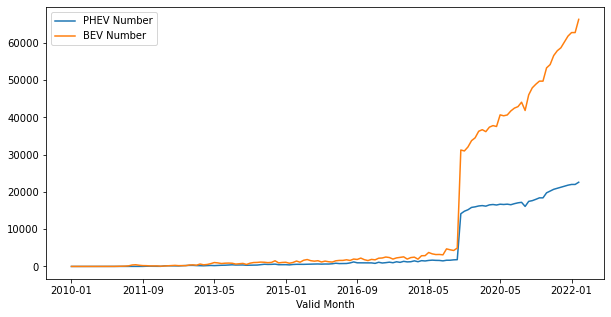

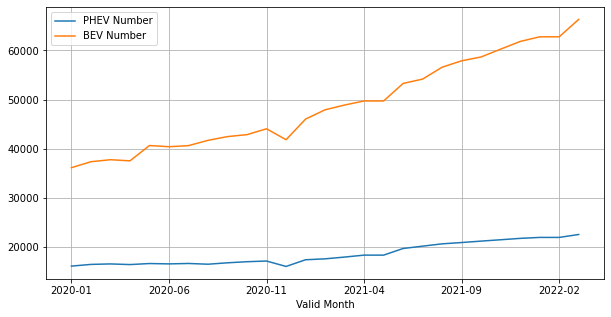

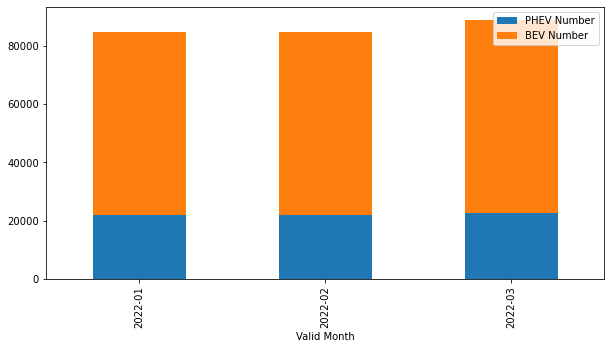

In [62]:
draw_month_report(wa_df_month)

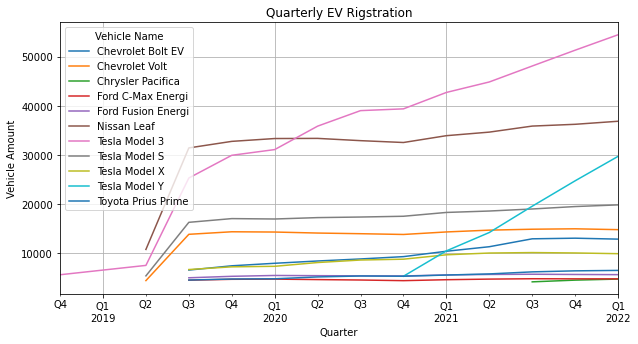

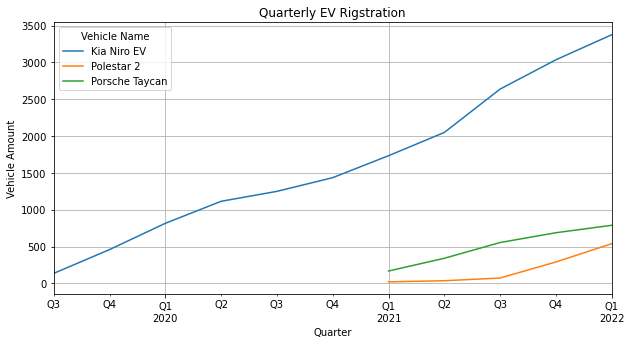

In [77]:
# draw multiple car quarterly data
def draw_vehicle_quarterly_data(df: pd.DataFrame, car_list: [], min_amount=0):
    df_quarter = df.groupby(['Vehicle Name', 'Valid Quarter'])\
        .agg({'DMV ID': 'count'}).reset_index()\
        .rename(columns={'DMV ID': 'Vehicles Amount'})
    if len(car_list) > 0:
        df_quarter = df_quarter[df_quarter['Vehicle Name'].isin(car_list)]
    df_quarter = df_quarter[df_quarter['Vehicles Amount'] >= min_amount]
    pd_pivot_car_in_quarter = pd.pivot(df_quarter, index='Valid Quarter', columns='Vehicle Name', values='Vehicles Amount')
    pd_pivot_car_in_quarter.plot(figsize=(10, 5), title='Quarterly EV Rigstration', grid=True, xlabel='Quarter', ylabel='Vehicle Amount')
    plt.show()

draw_vehicle_quarterly_data(wa_df, [], 4000)
draw_vehicle_quarterly_data(wa_df, ['Porsche Taycan', 'Kia Niro EV', 'Polestar 2'])

### New York State

In [63]:
ny_df = pd.read_csv('data/ny_ev_registrations_public.csv')
ny_df.head(10)

,ZIP Code,Registration Valid Date,VIN Prefix,DMV ID,DMV Snapshot,VIN Model Year,Registration Expiration Date,State,Vehicle Name,Technology
0,11797,2020-02-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-12-19,NY,Tesla Model X,BEV
1,11215,2018-09-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-20,NY,Tesla Model X,BEV
2,11040,2018-12-03,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2021-01-08,NY,Tesla Model X,BEV
3,11215,2018-09-30,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-29,NY,Tesla Model X,BEV
4,11976,2018-09-11,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-08-09,NY,Tesla Model X,BEV
5,10024,2018-08-08,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-08-07,NY,Tesla Model X,BEV
6,11231,2018-06-28,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV
7,12501,2018-09-17,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV
8,11720,2018-06-29,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-28,NY,Tesla Model X,BEV
9,14202,2018-06-28,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV


In [68]:
ny_df, ny_df_recently = preprocess_dataframe(ny_df, [2015, 1, 1])
print(ny_df.dtypes)

ZIP Code                                 int64
Registration Valid Date                 object
VIN Prefix                              object
DMV ID                                   int64
DMV Snapshot                            object
VIN Model Year                          object
Registration Expiration Date            object
State                                   object
Vehicle Name                            object
Technology                              object
Valid Datetime                  datetime64[ns]
Valid Month                             object
Valid Quarter                    period[Q-DEC]
Valid Year                              object
Dynamic Type                             int64
dtype: object


In [79]:
ny_df_month = get_monthly_report(ny_df)
print(ny_df_month)

    Valid Month  Vehicles Total Number  BEV Number  PHEV Number
0       2010-01                      1           1            0
1       2010-02                      5           5            0
2       2010-03                     13          13            0
3       2010-04                      9           9            0
4       2010-05                      7           7            0
..          ...                    ...         ...          ...
138     2021-11                  81787       60258        21529
139     2021-12                  83621       61811        21810
140     2022-01                  84762       62758        22004
141     2022-02                  84762       62758        22004
142     2022-03                  88903       66305        22598

[143 rows x 4 columns]


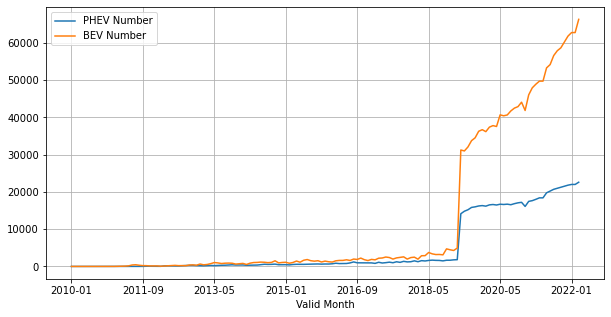

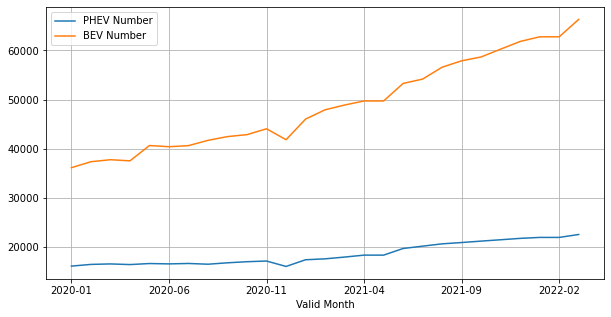

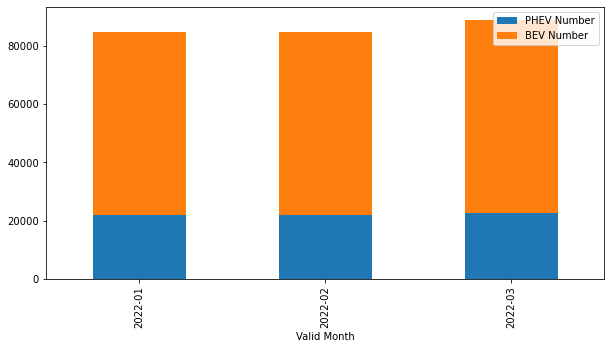

In [74]:
draw_month_report(ny_df_month)

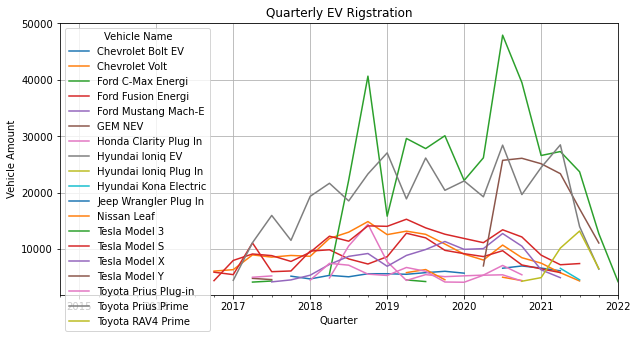

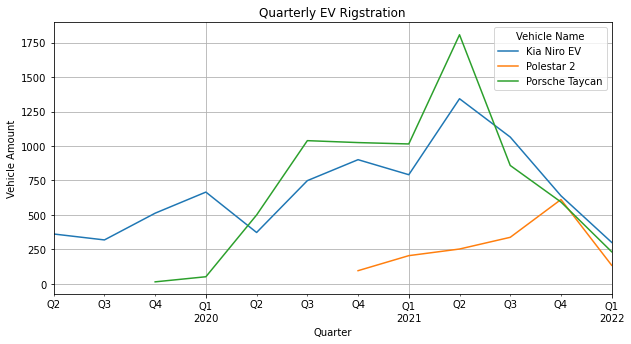

In [78]:
draw_vehicle_quarterly_data(ny_df, [], 4000)
draw_vehicle_quarterly_data(ny_df, ['Porsche Taycan', 'Kia Niro EV', 'Polestar 2'])

### Texas State

In [80]:
tx_df = pd.read_csv('data/ny_ev_registrations_public.csv')
tx_df.head(10)

,ZIP Code,Registration Valid Date,VIN Prefix,DMV ID,DMV Snapshot,VIN Model Year,Registration Expiration Date,State,Vehicle Name,Technology
0,11797,2020-02-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-12-19,NY,Tesla Model X,BEV
1,11215,2018-09-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-20,NY,Tesla Model X,BEV
2,11040,2018-12-03,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2021-01-08,NY,Tesla Model X,BEV
3,11215,2018-09-30,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-29,NY,Tesla Model X,BEV
4,11976,2018-09-11,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-08-09,NY,Tesla Model X,BEV
5,10024,2018-08-08,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-08-07,NY,Tesla Model X,BEV
6,11231,2018-06-28,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV
7,12501,2018-09-17,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV
8,11720,2018-06-29,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-28,NY,Tesla Model X,BEV
9,14202,2018-06-28,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-06-27,NY,Tesla Model X,BEV


In [81]:
tx_df, tx_df_recently = preprocess_dataframe(tx_df, [2015, 1, 1])
print(tx_df.dtypes)

ZIP Code                                 int64
Registration Valid Date                 object
VIN Prefix                              object
DMV ID                                   int64
DMV Snapshot                            object
VIN Model Year                          object
Registration Expiration Date            object
State                                   object
Vehicle Name                            object
Technology                              object
Valid Datetime                  datetime64[ns]
Valid Month                             object
Valid Quarter                    period[Q-DEC]
Valid Year                              object
Dynamic Type                             int64
dtype: object


In [82]:
tx_df_month = get_monthly_report(tx_df)
print(tx_df_month)

    Valid Month  Vehicles Total Number  BEV Number  PHEV Number
0       2010-01                      1           1            0
1       2010-02                      5           5            0
2       2010-03                     13          13            0
3       2010-04                      9           9            0
4       2010-05                      7           7            0
..          ...                    ...         ...          ...
138     2021-11                  81787       60258        21529
139     2021-12                  83621       61811        21810
140     2022-01                  84762       62758        22004
141     2022-02                  84762       62758        22004
142     2022-03                  88903       66305        22598

[143 rows x 4 columns]


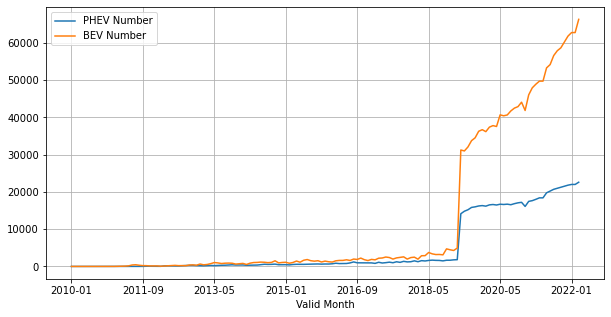

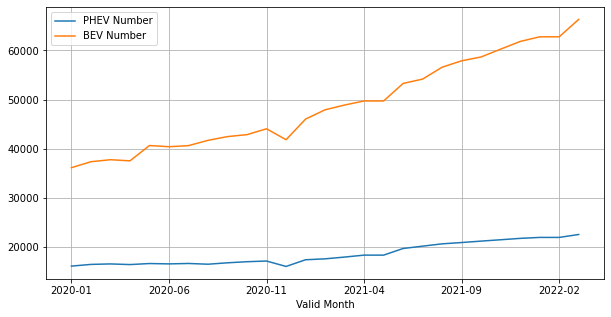

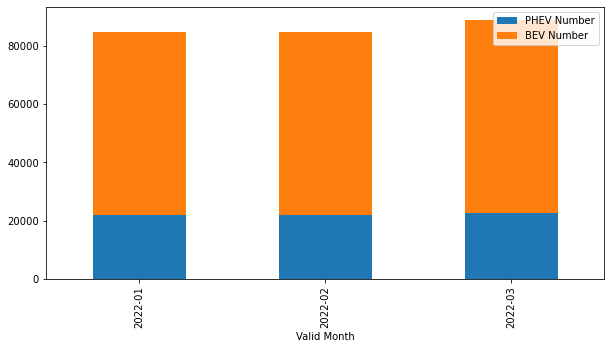

In [83]:
draw_month_report(tx_df_month)

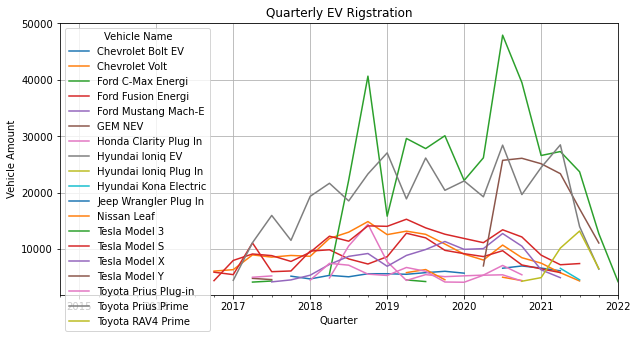

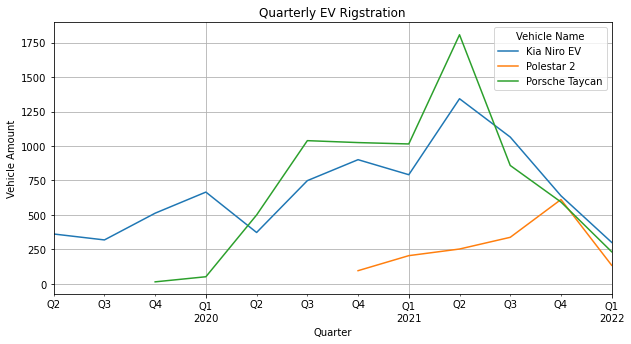

In [84]:
draw_vehicle_quarterly_data(tx_df, [], 4000)
draw_vehicle_quarterly_data(tx_df, ['Porsche Taycan', 'Kia Niro EV', 'Polestar 2'])